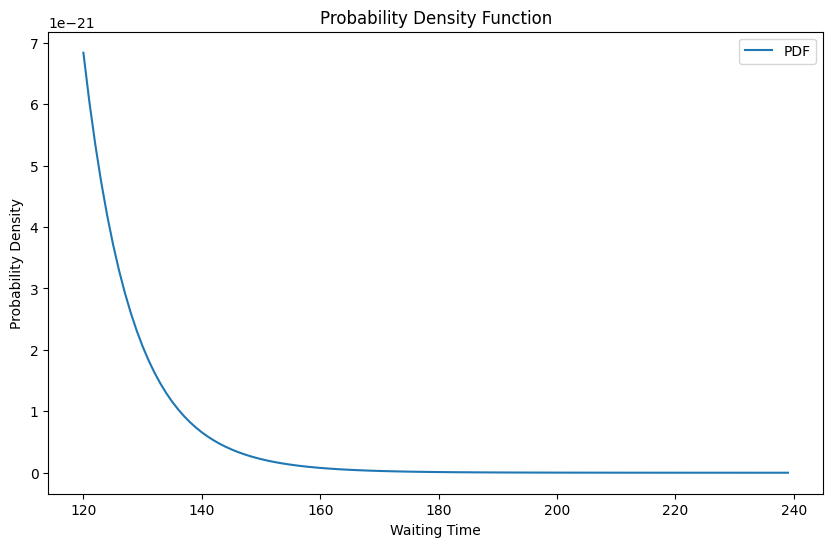

Probability of waiting between 120 and 240 Minutes (PDF 1): 0.00


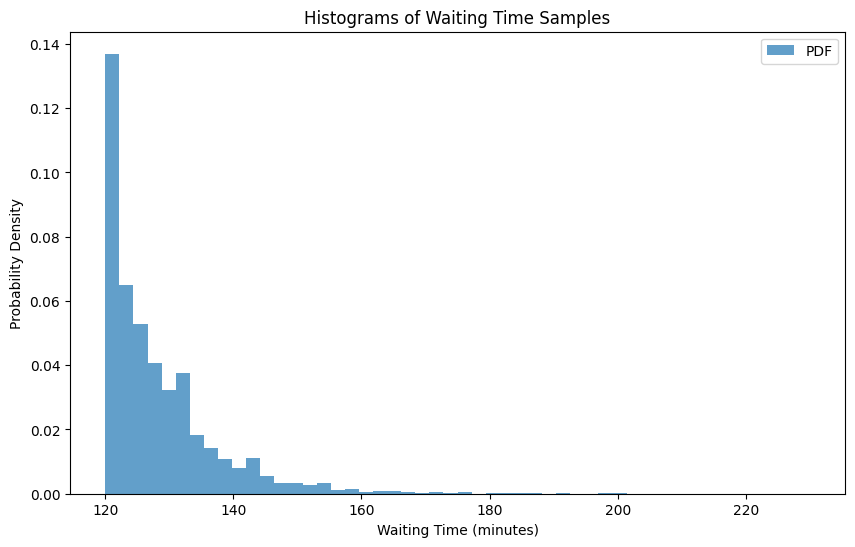

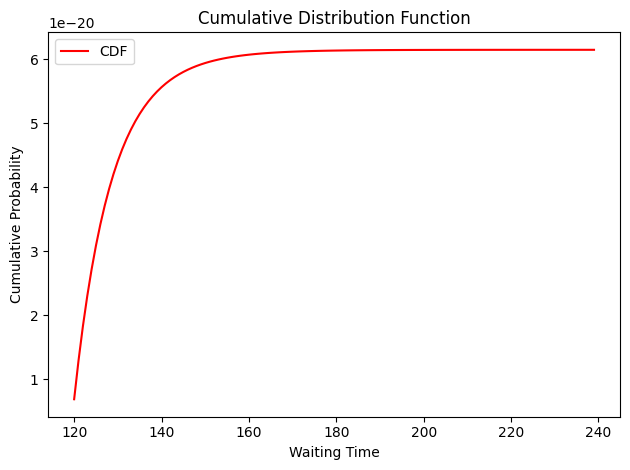

In [265]:
# Task 2: Basic Probabilities and Visualizations (2)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve


# Define the range of waiting times
y = np.arange(2*60, 4*60, 1)

# Set your parameter values
params = [2,0.86, 7, 0.13, 9]

# Define the probability density functions to wait to hear the owl

def pdf_1(y, params):
    return params[1] * np.exp(-params[2] * np.sqrt(y)) + params[3] * np.exp(-params[4] * (y**(1/3)))

# Calculate the probability density functions
pdf_v_1 = pdf_1(y, params)


# Plot the probability density functions
plt.figure(figsize=(10, 6))
plt.plot(y, pdf_v_1, label='PDF')
plt.title('Probability Density Function')
plt.xlabel('Waiting Time')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Integrate to find the cummulative distribution function that you need to wait between 120 and 240 minutes
probability_1, _ = quad(pdf_1, 2*60, 4*60, args=(params,))

print(f"Probability of waiting between 120 and 240 Minutes (PDF 1): {probability_1:.2f}")

# Generate random samples and create histograms
samples_1 = np.random.choice(y, size=10000, p=pdf_v_1/np.sum(np.nan_to_num(pdf_v_1)))


plt.figure(figsize=(10, 6))
plt.hist(samples_1, bins=50, density=True, alpha=0.7, label='PDF')

plt.title('Histograms of Waiting Time Samples')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


# Calculate the Cumulative Distribution Function (CDF)

cdf_v_1 = np.cumsum(pdf_v_1) * (y[1] - y[0])  # Numerical integration using cumulative sum


plt.plot(y, cdf_v_1, label='CDF', color='red')
plt.title('Cumulative Distribution Function')
plt.xlabel('Waiting Time')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()



Mean: 0.00
Variance: 0.00
Q1: 120.00
Median: 120.00
Q3: 120.00


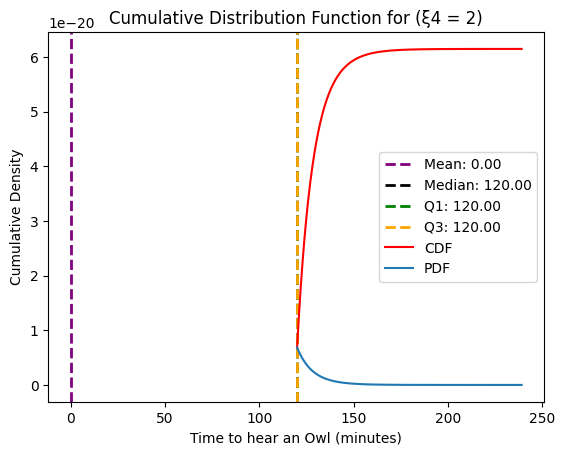

In [266]:
# Calculate the mean 
mean_waiting_time = np.mean(y * pdf_v_1)

# Calculate the variance using the CDF
variance = np.trapz((y - mean_waiting_time)**2 * pdf_v_1, y)

# Calculate quantiles (for example, Q1, median, Q3)
Q1 = fsolve(lambda x: np.interp(x, y, cdf_v_1) - 0.25, y[0])[0]
median = fsolve(lambda x: np.interp(x, y, cdf_v_1) - 0.50, y[0])[0]
Q3 = fsolve(lambda x: np.interp(x, y, cdf_v_1) - 0.75, y[0])[0]

print(f"Mean: {mean:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Q1: {Q1:.2f}")
print(f"Median: {median:.2f}")
print(f"Q3: {Q3:.2f}")

fig, ax = plt.subplots()
 
 
# Display mean, variance, and quartiles in the plot
ax.axvline(mean_waiting_time, color="purple", linestyle="dashed", linewidth=2, label=f'Mean: {mean_waiting_time:.2f}')
ax.axvline(median, color="black", linestyle="dashed", linewidth=2, label=f'Median: {median:.2f}')
ax.axvline(Q1, color="green", linestyle="dashed", linewidth=2, label=f'Q1: {Q1:.2f}')
ax.axvline(Q3, color="orange", linestyle="dashed", linewidth=2, label=f'Q3: {Q3:.2f}')
# plt.hist(samples_1, bins=50, density=True, alpha=0.7, label='PDF')
plt.plot(y, cdf_v_1, label='CDF', color='red')
plt.plot(y, pdf_v_1, label='PDF')


# Display the plot
plt.title(f'Cumulative Distribution Function for (ξ4 = {params[0]})')
plt.xlabel("Time to hear an Owl (minutes)")
plt.ylabel("Cumulative Density")
plt.legend()
plt.show()